# Proyek Analisis Data: Nama dataset
- Nama: Iklima Mardiana
- Email: iklimardiana911@gmail.com
- Id Dicoding: iklimardiana

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : kota mana yang memiliki pelanggan terbanyak?
- pertanyaan 2 : Produk apa yang memiliki penjualan terlaris dan penjualan paling sedikit?
- pertanyaan 3 : Produk apa yang memiliki rating tertinggi dan terendah?
- pertanyaan 4 : metode pembayaran apa yang sering digunakan pelanggan?
- pertanyaan 5 : kota mana yang memiliki seller terbanyak?

## Menyiapkan semua library yang dibutuhkan

In [2]:
# memanggil library-library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Data Wrangling

### Gathering Data

In [3]:
# Directory containing the CSV files
directory = "data/"

# opening datasets individually (ignored customers and sellers)
orders = pd.read_csv(directory + 'orders_dataset.csv')
items = pd.read_csv(directory + 'order_items_dataset.csv')
products = pd.read_csv(directory + 'products_dataset.csv')
payments = pd.read_csv(directory + 'order_payments_dataset.csv')
reviews = pd.read_csv(directory + 'order_reviews_dataset.csv')
customers = pd.read_csv(directory + 'customers_dataset.csv')
sellers = pd.read_csv(directory + 'sellers_dataset.csv')
geolocation = pd.read_csv(directory + 'geolocation_dataset.csv')
category = pd.read_csv(directory + 'product_category_name_translation.csv')

data = {'orders_df': orders,
        'order_items_df': items,
        'products_df': products,
        'payments_df': payments,
        'reviews_df': reviews,
        'customers_df': customers,
        'sellers_df': sellers,
        'geo_df': geolocation,
        'category_df': category}

In [4]:
# Memuat tabel customers
data['customers_df'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# memuat tabel geolocation
data['geo_df'].head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# memuat data order_items
data['order_items_df'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# memuat data order_payments
data['payments_df'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
# memuat data order_reviews
data['reviews_df'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
# memuat data orders
data['orders_df'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# memuat data product
data['category_df'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
# memuat data products
data['products_df'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
# memuat data sellers
data['sellers_df'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

1. Menilai data customer

In [13]:
# memeriksa tipe data customer
data['customers_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


data tersebut tidak terdapat tipe data yang salah dan keanehan nilai

In [14]:
# memeriksa missing value data customers
data['customers_df'].isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

data tersebut tidak mengandung missing value

In [15]:
# memeriksa duplikasi data 
print("Jumlah duplikasi: ",data['customers_df'].duplicated().sum())

Jumlah duplikasi:  0


In [16]:
# memeriksa parameter statistik data
data['customers_df'].describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


2. Menilai data geolocation

In [17]:
# memeriksa tipe data geolocation 
data['geo_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


data tersebut tidak terdapat tipe data yang salah dan keanehan nilai

In [18]:
# memeriksa missing value geolocation 
data['geo_df'].isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

data tersebut tidak terdapat missing value

In [19]:
# memeriksa duplikasi data geolocation
print("Jumlah duplikasi: ",data['geo_df'].duplicated().sum())

Jumlah duplikasi:  261831


data tersebut terdapat banyak duplikasi data

In [20]:
# memeriksa parameter statistik data geolocation
data['geo_df'].describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


3. menilai data order item

In [21]:
# memeriksa tipe data order item 
data['order_items_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
# memeriksa missing value order item 
data['order_items_df'].isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
# memeriksa duplikasi data order item 
print("Jumlah duplikasi: ",data['order_items_df'].duplicated().sum())

Jumlah duplikasi:  0


In [24]:
# memeriksa parameter statistik data order item 
data['order_items_df'].describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


4. menilai data order payment

In [25]:
# memeriksa tipe data order payment 
data['payments_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
# memeriksa missing value 
data['payments_df'].isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
# memeriksa duplikasi data order payment 
print("jumlah duplikasi: ", data['payments_df'].duplicated().sum())

jumlah duplikasi:  0


In [28]:
# memeriksa parameter statistik data order payment 
data['payments_df'].describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


5. menilai order review

In [29]:
# memeriksa tipe data order review 
data['reviews_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


data tersebut terdapat missing value dan kesalahan tipe data

In [30]:
# memeriksa missing value order review
data['reviews_df'].isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

data tersebut terdapat missing value pada review_comment_title dan review_comment_message

In [31]:
# memeriksa duplikasi data order review 
print("jumlah duplikasi: ", data['reviews_df'].duplicated().sum())

jumlah duplikasi:  0


In [32]:
# memeriksa parameter statistik data order review 
data['reviews_df'].describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


6. menilai data orders

In [33]:
# memeriksa tipe data order 
data['orders_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


data tersebut terdapat perbedaan jumlah pada 3 kolom yang menandakan adanya missing value dan kesalahan tipe data

In [34]:
# memeriksa missing value data order 
data['orders_df'].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [35]:
# memeriksa duplikasi data order 
print("jumlah duplikasi: ",data['orders_df'].duplicated().sum())

jumlah duplikasi:  0


In [36]:
# memeriksa parameter statistik data order 
data['orders_df'].describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


7. menilai data product category

In [37]:
# memeriksa tipe data product category 
data['category_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
# memeriksa missing value data product category 
data['category_df'].isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [39]:
# memeriksa duplikasi data product category 
print("jumlah duplikasi: ", data['category_df'].duplicated().sum())

jumlah duplikasi:  0


In [40]:
# memeriksa parameter statistik data product category 
data['category_df'].describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


8. menilai data products

In [41]:
# memeriksa tipe data product 
data['products_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [42]:
# memeriksa duplikasi data 
print("jumlah duplikasi: ",data['products_df'].duplicated().sum())

jumlah duplikasi:  0


In [43]:
# memeriksa missing value data product 
data['products_df'].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [44]:
# memeriksa parameter statistik data product 
data['products_df'].describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


9. menilai data seller

In [45]:
# memeriksa tipe data seller 
data['sellers_df'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [46]:
# memeriksa missing value data seller 
data['sellers_df'].isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [47]:
# memeriksa duplikasi data seller 
print ("jumlah duplikasi: ",data['sellers_df'].duplicated().sum())

jumlah duplikasi:  0


In [48]:
# memeriksa parameter statistik data seller 
data['sellers_df'].describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Hasil assesing data sementara

Berdasarkan tahapan assesing data di atas, terdapat informasi penting yang diperoleh, di antaranya :

- Terdapat duplikasi data pada dataset geolocation.csv
- Terdapat kesalahan tipe data pada dataset order_items.csv
- Terdapat missing value dan kesalahan tipe data pada dataset order_reviews.csv
- Terdapat missing value dan kesalahan tipe data pada dataset orders.csv
- Terdapat missing value pada dataset products.csv

### Cleaning Data

1. membersihkan duplikasi data

In [49]:
# menghapus duplikasi data geolocation 
data['geo_df'].drop_duplicates(inplace=True)

In [50]:
print("jumlah duplikasi data geolocation sudah menjadi", data['geo_df'].duplicated().sum())

jumlah duplikasi data geolocation sudah menjadi 0


2. menangani missing value

- Menangani data orders

In [51]:
# pertama, membetulkan tipe data pada tabel order terlebih dahulu
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  data['orders_df'][column] = pd.to_datetime(data['orders_df'][column])


In [52]:
data['orders_df'].info()
print("\n tipe data sudah berubah")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

 tipe data sudah berubah


data order ini merupakan data yang sangat penting karena memiliki keterhubungan dengan banyak tabel yang dihubungkan dengan order_id

In [53]:
# saya akan memilih data order yang memiliki status dilevered saja 
print(data['orders_df']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [54]:
print('pengambilan data dengan status dilevered yang mendominasi seluruh data dalam tabel orders, terdapat ' +
      str(round((data['orders_df'].order_status.value_counts()['delivered']/len(data['orders_df']))*100,2)) +
      '% dari keseluruhan data.')

pengambilan data dengan status dilevered yang mendominasi seluruh data dalam tabel orders, terdapat 97.02% dari keseluruhan data.


In [55]:
# pengambilan seluruh data order_id dengan status delivered
delivered = data['orders_df']['order_id'][data['orders_df']['order_status'] != 'delivered'].values

# memfilter setiap dataframe yang terdapat order_id sebagai foreign key
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)

In [56]:
# memeriksa missing value pada kolom order_delivered_customer_date di tabel orders 
print('Terdapat '+str(data['orders_df'].order_delivered_customer_date.isna().sum()) + 
      ' missing data pada status delivery')

Terdapat 8 missing data pada status delivery


In [57]:
# menghapus 8 data tersebut 
# mengambil data yang missing
miss_deliveries = data['orders_df']['order_id'][data['orders_df']['order_delivered_customer_date'].isna()].values

# memfilter setiap dataframe yang terdapat order_id sebagai foreign key 
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(miss_deliveries)].index, inplace = True)
        
# memastikan data terhapus 
print('jumlah missing data: '+ str(data['orders_df'].order_delivered_customer_date.isna().sum()))

jumlah missing data: 0


- menangani data reviews

In [58]:
# membetulkan tipe data 
datetime_columns = ["review_answer_timestamp", "review_creation_date"]
 
for column in datetime_columns:
  data['reviews_df'][column] = pd.to_datetime(data['reviews_df'][column])


In [59]:
# menangani missing data 
data['reviews_df'].isna().sum()

# terdapat kolom comment title dan comment message yang null, namun menenurut saya hal ini adalah wajar
# karena tidak semua orang membuat komentar pada suatu product
# sehingga, data ini akan tetap saya biarkan 

review_id                      0
order_id                       0
review_score                   0
review_comment_title       85149
review_comment_message     57259
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- menangani data products

In [60]:
# menangani missing data 
data['products_df'].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

kolom yang terindikasi missing value yaitu product_category_name, product_name_length, product_description_lenght, dan product_photos_qty. Untuk kolom product_name_length, product_description_lenght, dan product_photos_qty akan saya abaikan, dan tidak akan saya hapus/ drop, karena hal ini akan menghilangkan informasi-informasi penting lainnya jika dilakukan dropping. kolom ang akan saya tangani yaitu product_category_name

In [61]:
# mengisi kolom product_category_name dengan "other"
data['products_df']['product_category_name'].fillna(value='other', inplace=True)

# menampilkan data yang telah diperbaiki
data['products_df'].isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [62]:
data['customers_df'].sample(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
67607,84874c595637bb7aea0323c01a7e9c92,cced18dc0d1f0d8b16f75f5b5ec3e2fe,69304,boa vista,RR
84040,ab521f20fbe5728cb41ce5a50bb1762e,eb9e6cfff9699585f120e3fba3ebfc6a,5843,sao paulo,SP
90744,10091d0f711745db12815a7935577e26,a8bd559f5b029d6f96e3c9d134288dba,9993,diadema,SP
77316,023fafd700dff9fcc64d28e2defe98b9,06c18dc9dc7a01e3322f4e9245dac0ed,4576,sao paulo,SP
37589,54efba24ef631ff2c2088f8320499ea5,3ad8facb6eae216562fa5b74a17a6e9e,14790,guaira,SP
11768,5236b9bb00876aa56ee5ac4e2c816b68,55106b6ebf9f870a3a359a00d5f26d1c,44345,cabaceiras do paraguacu,BA
71435,bf36e212151102fe45397327fd25c235,122418b0421f2576d0cd3f22477c464b,89690,vargeao,SC


dari data tersebut, akan terlihat data customers terbanyak di suatu kota

### explore orders_df

In [63]:
data['customers_df'].sample(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
62791,528aaeab73d4582f7b8ee6c179db8fdd,d3be03e43c323663eed97506de2f80e4,22753,rio de janeiro,RJ
15560,50ca20518ce814665c93ce9b39832c3b,02eae69eeced34b78dfe3850b62e692a,87205,cianorte,PR
32228,ac7f2420ab4a76a90d70be194cce22cf,69a8ae4cb48f7ee543a238c78d2e0ff6,9180,santo andre,SP
69683,bb3dfc96067959cc506ae60e0e3dddc9,3732030d46376bb9af1a7fa6535ddc80,4014,sao paulo,SP
73063,b5e68fb5e0d12c368f0c52b434a69cf9,23fe80fda1bda7d8bf1b161dcd63f74e,86620,guaraci,PR
58671,80592dbf71be01f4059123025479d07d,e2d9fde54edad0357447ce00bab3e9e8,38045,uberaba,MG
17857,a68df3fd3ee564762f7ccef42f3aa14c,572f9b684aad25530f0c20d18da2e5a5,14095,ribeirao preto,SP


### explore payments_df

In [64]:
data['payments_df'].sample(7)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
45661,3c1bdb3d635a802bc38ca0b87c14f2e5,1,credit_card,1,69.04
77575,ab96ffdb4db7fa3807bfb7a512f2f519,1,credit_card,3,141.35
52869,8f332ee6ffc2a01f7e78ae983f257379,1,credit_card,4,324.82
35424,840609035f6daa3db6277e7a033b3edf,1,credit_card,2,41.69
94886,2548aa48f7db62d5579e7e20ae85ca03,1,boleto,1,138.89
21592,e864c88c30cc7fb46f79e88de8b6397d,1,boleto,1,77.60
6945,1beb1ec2b53087e6d0b01d852b823421,1,credit_card,3,79.24


### explore reviews_df

In [65]:
data['reviews_df'].sample(7)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
93214,5563a907e576cf31a7493fe3ddf40b7f,bf3358fdaf47c7a9abf288008dc1ec59,5,NaN,super satisfeita.\r\nproduto foi além das minh...,2018-02-08,2018-02-16 21:41:37
36722,f2a22014ea3e5ccae4f80206eb32052f,abfb6dbd8b0370761e851060356359b9,5,NaN,NaN,2017-12-12,2017-12-14 21:37:57
24348,62c5e339fbd26aefdf8ae84bb1309792,b3e77cf06c8d9e04fbbe2103aa4a7361,5,NaN,NaN,2018-05-04,2018-05-05 11:18:59
3553,a0cdf5e8ee43f7f87bd9234fa1936a05,bc16cd35390e6d0638d87ef92f626899,5,NaN,NaN,2017-10-05,2017-10-05 23:36:35
97228,91325adf8f84c24d1db88f0946be7044,5e724a9bb565d4ccd9078fec28d4fdc8,5,Lojas lannister A MELHOR,"Junto com a Netshoes, as Melhores Lojas On-Line",2018-06-09,2018-06-21 13:46:52
94383,20720a269ffa778add81d65dce225f6a,c37425205cecce5f1296f6a00115de5f,5,NaN,NaN,2018-08-30,2018-08-31 09:13:08
17119,6955e8b1c7f4630a1de7f0088032740b,9b2ed38884a6f4e144ec6ad371ac4112,4,NaN,NaN,2018-04-28,2018-04-28 21:07:15


### merge customers_df dengan orders_df

In [66]:
customers_orders_df = pd.merge(
    left=data['customers_df'],
    right=data['orders_df'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [67]:
customers_orders_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

data tersebut untuk mengetahui kota yang memiliki pelanggan terbanyak

### merge payments_df dengan reviews_df

In [68]:
payment_review_df = pd.merge(
    left=data['payments_df'],
    right=data['reviews_df'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

payment_review_df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,NaN,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,NaN,2017-12-21,2017-12-22 01:10:39


In [69]:
payment_review_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

In [70]:
payment_review_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,NaN,NaN,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,NaN,O produto é de boa qualidade e chegou no prazo...,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,NaN,Produto demorou a chegar e veio diferente do q...,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,NaN,NaN,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,NaN,NaN,2018-02-03,2018-02-11 17:34:29


data tersebut digunakan untuk mengetahui tipe pembayaran yang paling banyak digunakan oleh pelanggan

### merge customers_order dengan payment_review 

In [71]:
customers_merged_df = pd.merge(
    left=customers_orders_df,
    right=payment_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### merge order_items dengan seller

In [72]:
item_sellers_df = pd.merge(
    left=data['order_items_df'],
    right=data['sellers_df'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [73]:
item_sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64

data tersebut digunakan untuk melihat kota dengan seller terbanyak

### merge products_df dan category_df

In [74]:
products_df = pd.merge(
    left=data['products_df'],
    right=data['category_df'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


dilakukannya merge tersebut bertujuan untuk mendapatkan product category name dalam bahasa inggris yang terdapat pada tabel product_category_name_translation, agar mudah untuk dimengerti

In [75]:
products_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head()

product_category_name_english
bed_bath_table     3029
sports_leisure     2867
furniture_decor    2657
health_beauty      2444
housewares         2335
Name: product_id, dtype: int64

### merge item_sellers dengan products_df 

In [76]:
sellers_df = pd.merge(
    left=products_df,
    right=item_sellers_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


### explore all data

- merge all data

In [77]:
all_data_df = pd.merge(
    left=customers_merged_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [78]:
all_data_df = all_data_df.drop_duplicates('order_id')

In [79]:
all_data_df.isnull().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             1
order_status                         1
order_purchase_timestamp             1
order_approved_at                   15
order_delivered_carrier_date         2
order_delivered_customer_date        1
order_estimated_delivery_date        1
payment_sequential                   2
payment_type                         2
payment_installments                 2
payment_value                        2
review_id                          648
review_score                       648
review_comment_title             85284
review_comment_message           57563
review_creation_date               648
review_answer_timestamp            648
product_id                           0
product_category_name                0
product_name_lenght               1359
product_description_lengh

In [80]:

# menghitung rata-rata skor ulasan per kategori produk
product_ratings = all_data_df.groupby('product_category_name_english')['review_score'].mean().round(1).reset_index()

# Produk dengan rating tertinggi (top 5)
top_rated_products = product_ratings.sort_values(by='review_score', ascending=False).head(5)

# Produk dengan rating terendah (bottom 5)
bottom_rated_products = product_ratings.sort_values(by='review_score', ascending=True).head(5)

print("5 Produk dengan Rating Tertinggi:")
print(top_rated_products)

print("\n5 Produk dengan Rating Terendah:")
print(bottom_rated_products)

5 Produk dengan Rating Tertinggi:
   product_category_name_english  review_score
29     fashion_childrens_clothes           5.0
11             cds_dvds_musicals           4.7
52                    la_cuisine           4.5
8         books_general_interest           4.5
35                       flowers           4.4

5 Produk dengan Rating Terendah:
   product_category_name_english  review_score
61         security_and_services           2.5
57              office_furniture           3.6
30         fashion_male_clothing           3.8
46                home_comfort_2           3.8
4                          audio           3.9


In [99]:
all_data_df["order_purchase_timestamp"].fillna(all_data_df["order_purchase_timestamp"].min(), inplace=True)

In [100]:
all_data_df.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             1
order_status                         1
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date         2
order_delivered_customer_date        1
order_estimated_delivery_date        1
payment_sequential                   2
payment_type                         2
payment_installments                 2
payment_value                        2
review_id                          648
review_score                       648
review_comment_title             85284
review_comment_message           57563
review_creation_date               648
review_answer_timestamp            648
product_id                           0
product_category_name                0
product_name_lenght               1359
product_description_lengh

### convert all_data to .csv

In [101]:
all_data_df.to_csv("data/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: kota mana yang memiliki pelanggan terbanyak?

In [83]:
customer_city_df = all_data_df.groupby(by="customer_city").agg({
    "customer_id": "nunique"
    }).sort_values(by="customer_id", ascending=False)

customer_city_df.head()

,customer_id
customer_city,
sao paulo,15045
rio de janeiro,6601
belo horizonte,2697
brasilia,2071
curitiba,1489


C:\Users\user\AppData\Local\Temp\ipykernel_13116\1620740274.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_13116\1620740274.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


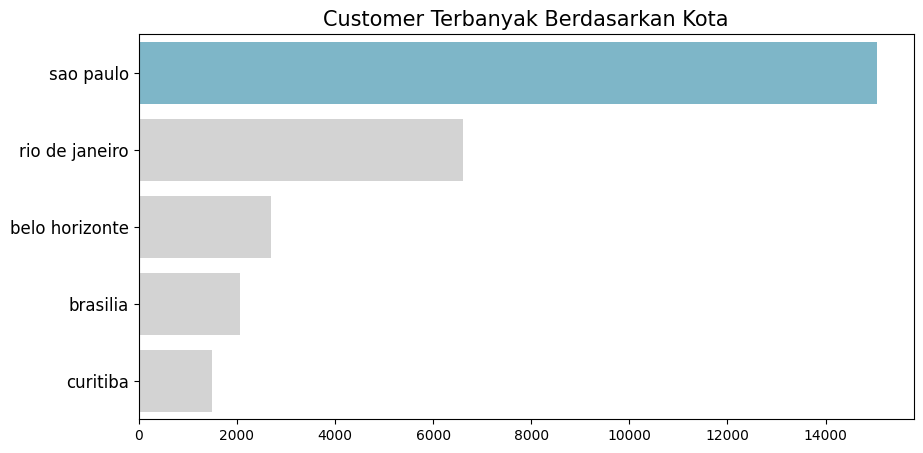

In [103]:
customer_bycity_df = all_data_df.groupby(by="customer_city").customer_id.nunique().reset_index()
customer_bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

customer_bycity_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="customer_city",
    data=customer_bycity_df.sort_values(by="customer_count", ascending=False).head(5),
    palette=colors_
)

plt.title("Customer Terbanyak Berdasarkan Kota", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2: Kategori produk apa yang memiliki penjualan paling banyak dan paling sedikit?

In [104]:
sum_order_item_df = all_data_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique"
    }).sort_values(by="product_id", ascending=False)

sum_order_item_df.rename(columns={'product_id': 'total_orders'}, inplace=True)

sum_order_item_df = all_data_df.groupby(by="product_category_name_english").product_id.nunique().reset_index()
sum_order_item_df.rename(columns={
    "product_id": "total_orders"
}, inplace=True)

print('5 Kategori Produk paling banyak terjual:')
sum_order_item_df.head(5) 

5 Kategori Produk paling banyak terjual:


,product_category_name_english,total_orders
0,agro_industry_and_commerce,71
1,air_conditioning,120
2,art,52
3,arts_and_craftmanship,17
4,audio,57


In [86]:
print('5 Kategori Produk paling sedikit terjual:')
sum_order_item_df.sort_values(by='total_orders', ascending=True).head(5)

5 Kategori Produk paling sedikit terjual:


,total_orders
product_category_name_english,
cds_dvds_musicals,1
security_and_services,2
fashion_childrens_clothes,4
home_comfort_2,5
la_cuisine,9


C:\Users\user\AppData\Local\Temp\ipykernel_13116\3216400063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_orders", y="product_category_name_english", data=sum_order_item_df.head(5), palette=colors, ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_13116\3216400063.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_orders", y="product_category_name_english", data=sum_order_item_df.sort_values(by="total_orders", ascending=True).head(5), palette=colors, ax=ax[1])


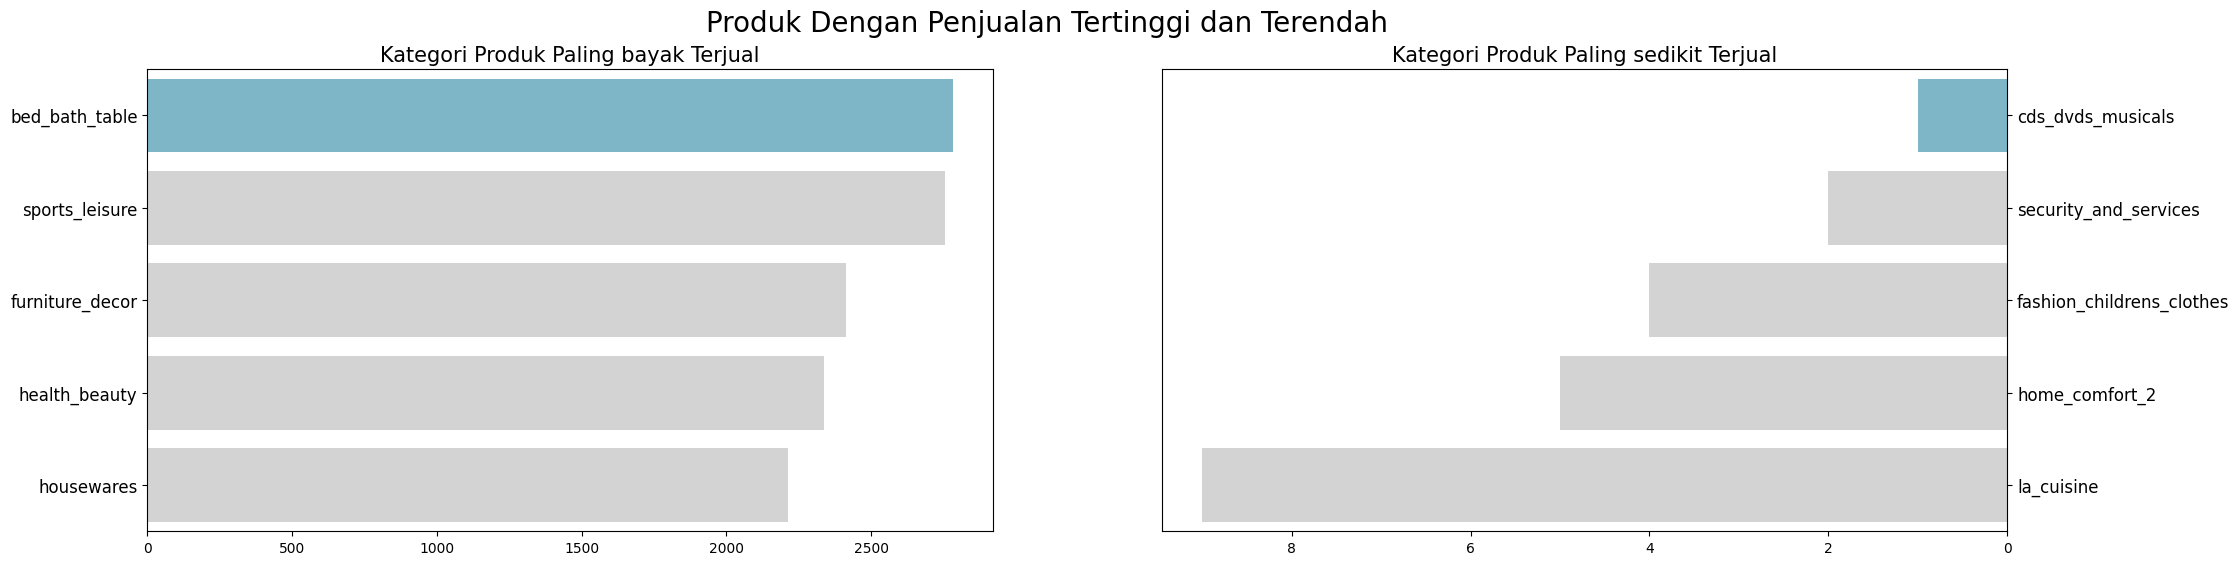

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="total_orders", y="product_category_name_english", data=sum_order_item_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Kategori Produk Paling bayak Terjual", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="total_orders", y="product_category_name_english", data=sum_order_item_df.sort_values(by="total_orders", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Kategori Produk Paling sedikit Terjual", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Produk Dengan Penjualan Tertinggi dan Terendah", fontsize=20)
plt.show()

### pertanyaan 3 : Produk apa yang memiliki rating terendah?

In [110]:

# menghitung rata-rata skor ulasan per kategori produk
product_ratings = all_data_df.groupby('product_category_name_english')['review_score'].mean().round(1).reset_index()

print("5 Produk dengan Rating Terendah:")
product_ratings.sort_values(by='review_score', ascending=True).head(5)


5 Produk dengan Rating Terendah:


,product_category_name_english,review_score
61,security_and_services,2.5
57,office_furniture,3.6
30,fashion_male_clothing,3.8
46,home_comfort_2,3.8
4,audio,3.9


C:\Users\user\AppData\Local\Temp\ipykernel_13116\3515163699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


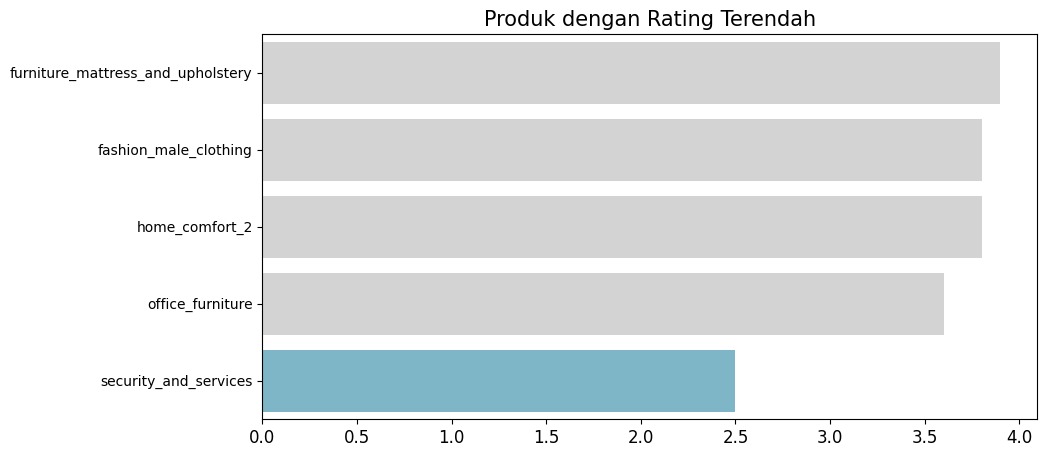

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [89]:
plt.figure(figsize=(10, 5))

colors2 = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]

sns.barplot(
    y="product_category_name_english",
    x="review_score",
    data=product_ratings.sort_values(by="review_score", ascending=False).tail(5),
    palette=colors2
)
plt.title("Produk dengan Rating Terendah", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

plt.figure(figsize=(10, 5))


### pertanyaan 4 : Bagaimana tren dalam metode pembayaran yang digunakan oleh pelanggan?

In [90]:
order_payment_tren_df = all_data_df.groupby('payment_type').agg({"order_id": "nunique"}).sort_values(by="order_id", ascending=False)
order_payment_tren_df = order_payment_tren_df.reset_index()
order_payment_tren_df.head()

,payment_type,order_id
0,credit_card,73213
1,boleto,19191
2,voucher,2582
3,debit_card,1483


C:\Users\user\AppData\Local\Temp\ipykernel_13116\2236008850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_13116\2236008850.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


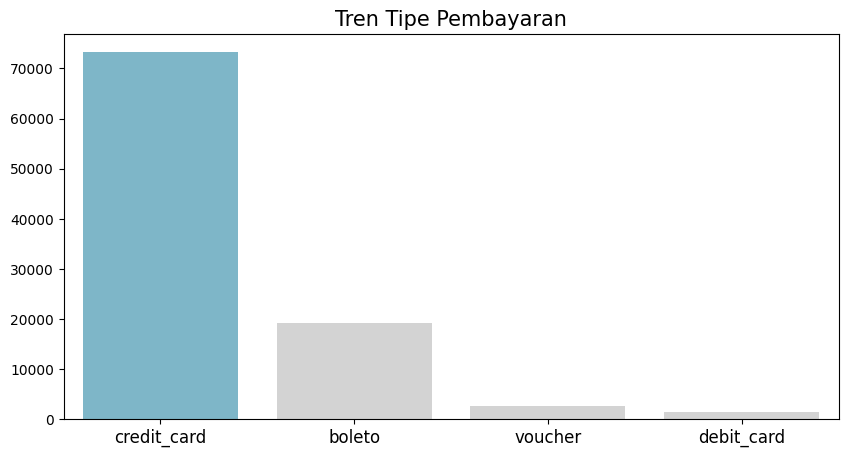

In [91]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="order_id",
    x="payment_type",
    data=order_payment_tren_df.sort_values(by="order_id", ascending=False),
    palette=colors
)
plt.title("Tren Tipe Pembayaran", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### pertanyaan 5 : kota mana yang memiliki penjual terbanyak?

In [92]:
seller_city_df = all_data_df.groupby(by="seller_city").agg({
    "seller_id": "nunique"
    }).sort_values(by="seller_id", ascending=False)

customer_city_df.head()

,customer_id
customer_city,
sao paulo,15045
rio de janeiro,6601
belo horizonte,2697
brasilia,2071
curitiba,1489


C:\Users\user\AppData\Local\Temp\ipykernel_13116\1729657580.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\user\AppData\Local\Temp\ipykernel_13116\1729657580.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(


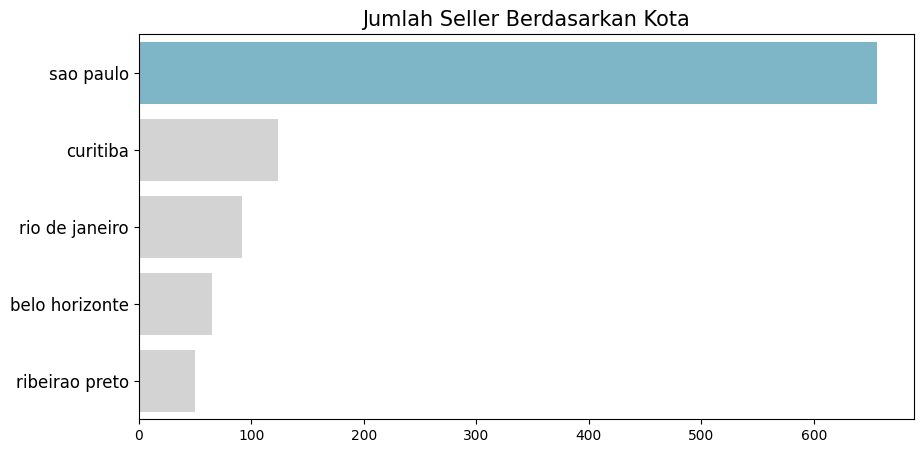

In [93]:
seller_city_df = all_data_df.groupby(by="seller_city").seller_id.nunique().reset_index()
seller_city_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)

seller_city_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="seller_count", 
    y="seller_city",
    data=seller_city_df.sort_values(by="seller_count", ascending=False).head(5),
    palette=colors_
)

plt.title("Jumlah Seller Berdasarkan Kota", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- pertanyaan 1 : kota mana yang memiliki pelanggan terbanyak?
- pertanyaan 2 : Kategori produk apa yang memiliki penjualan terlaris dan penjualan paling sedikit?
- pertanyaan 3 : Kategori roduk apa yang memiliki rating terendah?
- pertanyaan 4 : metode pembayaran apa yang sering digunakan pelanggan?
- pertanyaan 5 : kota mana yang memiliki seller terbanyak?

### kota mana yang memiliki pelanggan terbanyak?

Dari hasil visualisasi data, terlihat bahwa kota **Sao Paulo** memiliki jumlah pelanggan terbanyak, diikuti oleh **Rio De Janeiro** dan **Belo Horizonte**.

Pemangku kepentingan (stakeholder) dapat menggunakan informasi ini selama proses pengambilan keputusan. Stakeholder dapat melihat bahwa Sao Paulo, Rio de Janeiro, dan Belo Horizonte memiliki potensi pengembangan bisnis yang besar karena mereka memiliki banyak pelanggan. Hal ini dapat mencakup peningkatan strategi promosi, pemasaran yang lebih intens, atau penyediaan layanan khusus untuk memenuhi permintaan yang besar di daerah tersebut.

### Kategori produk apa yang memiliki penjualan terlaris dan penjualan paling sedikit?

Dilihat dari visualisasi data yang telah dibuat, produk dengan penjualan terlaris yaitu **bad bath table** diikuti dengan **sport_leisure** dan **furniture_decore** hal ini dapat dijadikan sebagai dasar untuk merencanakan strategi pemasaran lebih lanjut, menyusun persediaan produk dengan lebih efisien, dan memperhatikan tren permintaan pelanggan. Di sisi lain, produk dengan penjualan paling sedikit adalah **cds_dvd_musical**, **security and services**, dan **children fashion clothes**. Meskipun memiliki penjualan yang lebih rendah, pemahaman mendalam terhadap produk-produk ini dapat membantu mengidentifikasi potensi peningkatan atau penyesuaian yang diperlukan dalam strategi pemasaran dan penempatan produk di pasaran.

### Kategori roduk apa yang memiliki rating terendah?

Dari visualisasi data, dapat terlihat kategori produk yang memiliki rating terendah yaitu **security and services** diikuti dengan **office furniture** dan **home comfort** hal ini dapat menjadi dasar untuk meningkatkan kualitas produk, peningkatan layanan pelanggan, inovasi produk, dan lain-lain untuk meningkatkan rating produk tersebut.

### metode pembayaran apa yang sering digunakan pelanggan?

Dilihat dari visualisasi data yang telah dibuat, metode pembayaran yang paling banyak digunakan oleg pelanggan yaitu **credit card** di antara metode pembayaran lain yaitu boleto, voucher, dan debit card. hal ini dapat dijadikan sebagai dasar untuk menyusun strategi pembayaran yang lebih efektif dan meningkatkan kenyamanan pelanggan. Ini dapat mencakup pengoptimalan pengalaman pembayaran dengan kartu kredit, peningkatan promosi atau insentif khusus untuk pelanggan yang menggunakan metode ini

### kota mana yang memiliki seller terbanyak?

Dilihat dari visualisasi data yang telah dibuat, kota yang memiliki seller terbanyak yaitu **Sao Paulo** diikuti dengan **Curitiba** dan **Rio De Janeiro**, hal ini dapat dijadikan sebagai dasar untuk fokus strategi peningkatan dan pengelolaan rantai pasokan di kota-kota tersebut. Perusahaan dapat mengoptimalkan distribusi, meningkatkan layanan pelanggan, atau bahkan meningkatkan cakupan pasar dan efisiensi operasional kota-kota tersebut